In this notebook, I will show you how to get stock prices from Quandl in different ways and plot the stock price using Matplotlib,Bokeh and Plotly.

#### 1.Installing required libraries

In [3]:
! pip install requests

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
! pip install quandl

  Running setup.py bdist_wheel for inflection ... done
  Stored in directory: /Users/derichong/Library/Caches/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### 2.Getting Data from Quandl

In [16]:
import quandl
quandl.ApiConfig.api_key = 'PQqYzRyDSiEk2WNX-7E7'
# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT','ZUMZ','GOOG'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2017-01-01', 'lte': '2017-12-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,ZUMZ,2017-12-29,20.825
1,ZUMZ,2017-12-28,21.200
2,ZUMZ,2017-12-27,21.150
3,ZUMZ,2017-12-26,21.850
4,ZUMZ,2017-12-22,21.450


In [18]:
new = data.set_index('date')
# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')
# check the head of the output
clean_data.head()

adj_close                                     
ticker            AAPL    GOOG       MSFT        WMT   ZUMZ
date                                                       
2017-01-03  114.715378  786.14  61.219142  67.291215  22.00
2017-01-04  114.586983  786.90  60.945231  67.683241  22.75
2017-01-05  115.169696  794.02  60.945231  67.830251  20.60
2017-01-06  116.453639  806.15  61.473488  66.899190  19.85
2017-01-09  117.520300  806.65  61.277837  67.340219  19.95

In [138]:
clean_data.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=250, freq=None)

#### 3. Data Visualization 

##### 3.1 Using Matplotlib

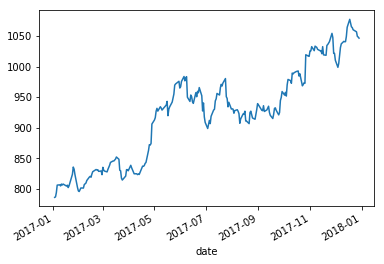

In [150]:
%matplotlib inline
clean_data['adj_close']['GOOG'].plot()

##### 3.2 Using Bokeh
* When you run the code below, the plot will be shown in a new webpage.

In [131]:
import numpy as np
from bokeh.plotting import figure, output_file, show

In [647]:
# prepare some data
goog = np.array(clean_data['adj_close']['GOOG'])
goog_dates = np.array(clean_data.index)
window_size = 30
window = np.ones(window_size)/float(window_size)
goog_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(goog_dates, goog_avg, size=4, color='darkgrey', alpha=0.3, legend='monthly-avg')
p.line(aapl_dates, aapl, color='blue', legend='daily-adjusted')

# NEW: customize by setting attributes
p.title.text = "GOOG One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

##### 3.3 Using Plotly
* When you run the code below, the plot will be shown in a new webpage.

In [648]:
import plotly
import plotly.graph_objs as go
import pandas as pd

price = [go.Scatter(
          x=clean_data.index,
          y=clean_data['adj_close']['AAPL'])]

plotly.offline.plot(price)

'temp-plot.html'

#### 4. Different Way of Extracting Stock Prices From Quandl (Using json file)

In [650]:
import requests
url = 'https://www.quandl.com/api/v1/datasets/WIKI/GOOG.json?api_key=PQqYzRyDSiEk2WNX-7E7'
r = requests.get(url)
a = r.json()
a

{'errors': {},
 'id': 9775718,
 'source_name': 'Wiki EOD Stock Prices',
 'source_code': 'WIKI',
 'code': 'GOOG',
 'name': 'Alphabet Inc (GOOG) Prices, Dividends, Splits and Trading Volume',
 'urlize_name': 'Alphabet-Inc-GOOG-Prices-Dividends-Splits-and-Trading-Volume',
 'display_url': 'http://www.quandl.com/WIKI/GOOG',
 'description': "End of day open, high, low, close and volume, dividends and splits, and split/dividend adjusted open, high, low close and volume for Google Inc. (GOOG). Ex-Dividend is non-zero on ex-dividend dates. Split Ratio is 1 on non-split dates. Adjusted prices are calculated per CRSP (www.crsp.com/products/documentation/crsp-calculations)\n\nThis data is in the public domain. You may copy, distribute, disseminate or include the data in other products for commercial and/or noncommercial purposes.\n\nThis data is part of Quandl's Wiki initiative to get financial data permanently into the public domain. Quandl relies on users like you to flag errors and provide data

In [651]:
df1 = pd.DataFrame(a['data'], columns=a['column_names'])

In [653]:
df1.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,1063.00,1064.84,996.92,1005.10,3029471.0,0.0,1.0,1063.00,1064.84,996.92,1005.10,3029471.0
1,2018-03-26,1046.00,1055.63,1008.40,1053.21,2558385.0,0.0,1.0,1046.00,1055.63,1008.40,1053.21,2558385.0
2,2018-03-23,1047.03,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.03,1063.36,1021.22,1021.57,2113497.0
3,2018-03-22,1081.88,1082.90,1045.91,1049.08,2580374.0,0.0,1.0,1081.88,1082.90,1045.91,1049.08,2580374.0
4,2018-03-21,1092.74,1106.30,1085.15,1090.88,1640709.0,0.0,1.0,1092.74,1106.30,1085.15,1090.88,1640709.0


In [654]:
# change the column 'Date' to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])


When you run the code below, the plot will be shown in a new webpage.

In [656]:
p = figure(title='Stock prices for Google',
            x_axis_label='date',
            x_axis_type='datetime')
        
#if request.form.get('Close'):
p.line(x=df1['Date'].values, y=df1['Close'].values,line_width=3, legend='Close')
#if request.form.get('Adj. Close'):
p.line(x=df1['Date'].values, y=df1['Adj. Close'].values,line_width=3, line_color="green", legend='Adj. Close')
#if request.form.get('Open'):
p.line(x=df1['Date'].values, y=df1['Open'].values,line_width=3, line_color="red", legend='Open')
#if request.form.get('Adj. Open'):
p.line(x=df1['Date'].values, y=df1['Adj. Open'].values,line_width=3, line_color="purple", legend='Adj. Open')
show(p)
